In [113]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [114]:
# fungsi untuk mengkonversi gambar ke grayscale
def convertToGray(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray

In [115]:
# fungsi untuk memotong gambar di tengah (jika ukuran kedua gambar tidak sama)
def cropCenter(img, target_h, target_w):
  y = (img.shape[0] - target_h) // 2
  x = (img.shape[1] - target_w) // 2
  return img[y:y+target_h, x:x+target_w]

In [116]:
# fungsi untuk mengkonversi gambar grayscale ke biner
def convertToBinary(gray_img):
  _, binary = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
  return binary

In [117]:
# form 1 - negative transform
def showNegative(image):
  return 255 - image

In [118]:
# form 1 - log transform
def showLogTransform(image):
  img_float = np.float32(image) + 1
  log_img = np.log(img_float)
  log_img = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)
  return np.uint8(log_img)

In [119]:
# form 1 - power law (gamma) transform
def showGamma(image, gamma=1.0):
  img_float = np.float32(image) / 255.0
  gamma_corrected = np.power(img_float, gamma)
  return np.uint8(gamma_corrected * 255)

In [120]:
# form 1 - piecewise linear transform
def showPiecewise(image, r1=70, r2=140, s1=0, s2=255):
    img_out = image.copy()
    for y in range(image.shape[0]):
      for x in range(image.shape[1]):
        for c in range(3):
          r = image[y, x, c]
          if r < r1:
            img_out[y, x, c] = s1
          elif r <= r2:
            img_out[y, x, c] = int((s2 - s1)/(r2 - r1)*(r - r1) + s1)
          else:
            img_out[y, x, c] = 255
    return img_out

In [121]:
# form 2 - bit plane slicing
def showBitPlane(image, bit):
  gray = convertToGray(image)
  assert 0 <= bit <= 7, "Bit harus antara 0 sampai 7"
  plane = ((gray >> bit) & 1) * 255

  titles = ['Original Image', f'Bit-plane {bit}']
  images = [image, plane]

  plt.figure(figsize=(10, 5))
  for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

In [122]:
# form 3 - subtraction
def showSubtraction(img1, img2):
  gray1 = convertToGray(img1)
  gray2 = convertToGray(img2)
  h = min(gray1.shape[0], gray2.shape[0])
  w = min(gray1.shape[1], gray2.shape[1])
  gray1_cropped = cropCenter(gray1, h, w)
  gray2_cropped = cropCenter(gray2, h, w)

  result = cv2.absdiff(gray1_cropped, gray2_cropped)

  titles = ['Image 1 (cropped)', 'Image 2 (cropped)', 'Subtraction (abs)']
  images = [gray1_cropped, gray2_cropped, result]

  plt.figure(figsize=(12, 4))
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

In [123]:
# form 4 - logical operations
def showLogicOperations(img1, img2):
  h = min(img1.shape[0], img2.shape[0])
  w = min(img1.shape[1], img2.shape[1])

  gray1 = convertToGray(img1)
  gray2 = convertToGray(img2)

  gray1_crop = cropCenter(gray1, h, w)
  gray2_crop = cropCenter(gray2, h, w)

  biner1 = convertToBinary(gray1_crop)
  biner2 = convertToBinary(gray2_crop)

  and_img = cv2.bitwise_and(biner1, biner2)
  or_img  = cv2.bitwise_or(biner1, biner2)
  xor_img = cv2.bitwise_xor(biner1, biner2)

  titles = ['Biner 1', 'Biner 2', 'AND', 'OR', 'XOR']
  images = [biner1, biner2, and_img, or_img, xor_img]

  plt.figure(figsize=(12, 6))

  for i in range(2):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

  for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(images[i+2], cmap='gray')
    plt.title(titles[i+2])
    plt.axis('off')

  return

In [124]:
# fungsi untuk menampilkan hasil form 1
def showAllTransforms(image, gamma=1.5, r1=70, r2=140, s1=0, s2=255):
  negativeImg = showNegative(image)
  logImg = showLogTransform(image)
  gammaImg = showGamma(image, gamma)
  piecewiseImg = showPiecewise(image, r1, r2, s1, s2)

  titles = ['Original', 'Negative', 'Log Transform', f'Gamma ({gamma})', 'Piecewise']
  images = [image, negativeImg, logImg, gammaImg, piecewiseImg]

  plt.figure(figsize=(15, 8))
  for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

In [125]:
# ganti dengan path gambar (untuk pengolahan 1 citra)
img = cv2.imread('../../../images/kucing.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ganti dengan path gambar (untuk pengolahan 2 citra)
img1 = cv2.imread('../../../images/kucing.png')
img2 = cv2.imread('../../../images/image.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

Transformasi Citra:


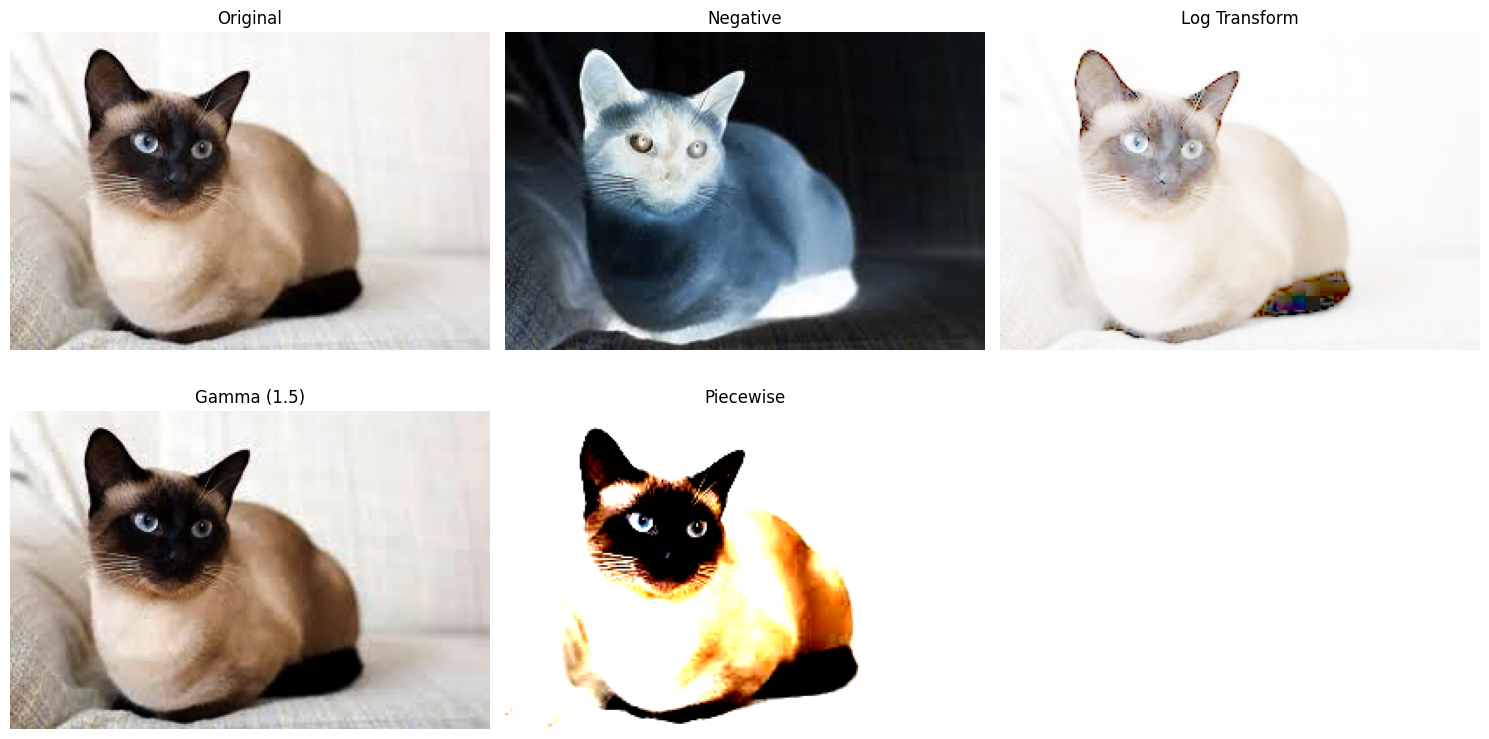

In [126]:
# ubah parameter gamma, r1, r2, s1, s2 sesuai kebutuhan
print("Transformasi Citra:")
showAllTransforms(img_rgb, gamma=1.5, r1=70, r2=140, s1=0, s2=255)

Bit plane slicing:


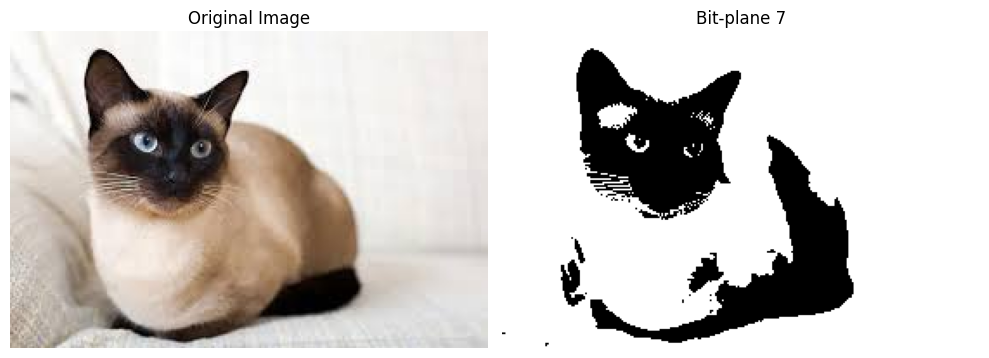

In [127]:
# ubah parameter bit sesuai kebutuhan
print("Bit plane slicing:")
showBitPlane(img_rgb, 7)

images subtraction:


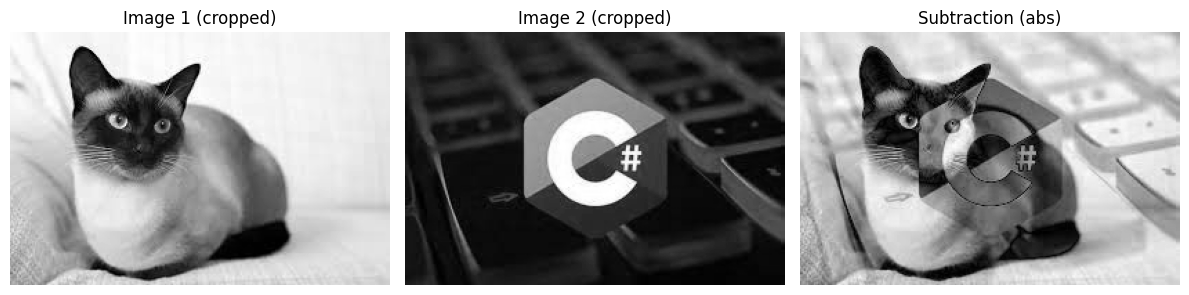

In [128]:
print("images subtraction:")
showSubtraction(img1_rgb, img2_rgb)

logical operations:


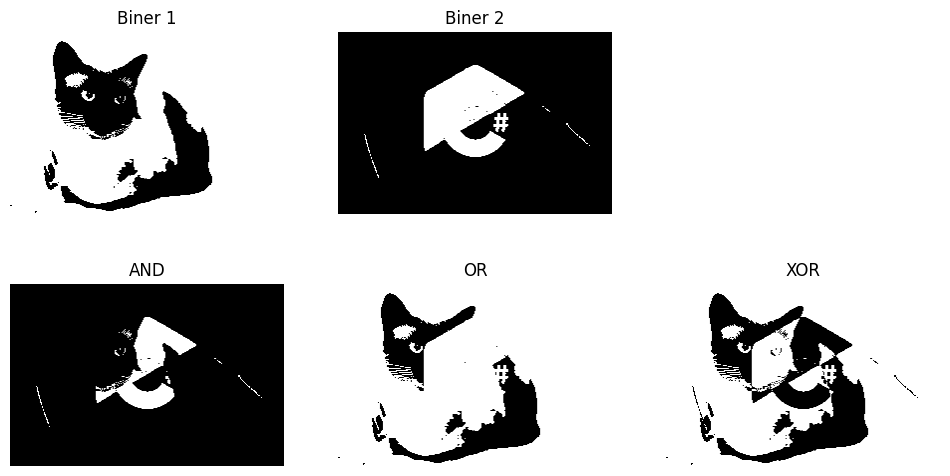

In [129]:
print("logical operations:")
showLogicOperations(img1_rgb, img2_rgb)